# Making Final Figures from Observational Data
*Akira Di Sandro, 6/26/20*
<br>
In this notebook, I will be plotting time series of transport from the 'SolomonStrait_westernXsection_linear2bot_sat4surf.mat' file and an average of all the other non-geoRef files. 

## 1.  Import packages and Load in data

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import random

In [2]:
from scipy.io import loadmat
x = loadmat('allTransport_SolomonStrait.mat')

## 2. Convert time stamps into legible and usable ones

### a. Legible to humans

In [3]:
datenums = x['time'][0]
# this line below reads matlab datenums and returns datetime in human legible format
timestamps = pd.to_datetime(datenums-719529, unit='D')

### b. Timestamps in vector format for python

In [4]:
# this code reads matlab datenums and returns it in a datetime vector. 
def matlab2datetime(matlab_datenum):
    day = dt.datetime.fromordinal(int(matlab_datenum))
    dayfrac = dt.timedelta(days=matlab_datenum%1) - dt.timedelta(days = 366)
    return day + dayfrac

In [5]:
py_dt = []

for time in datenums:
    py_dt = np.concatenate([py_dt, [matlab2datetime(int(time))]])
#py_dt

## 3. Plot Transport timeseries of 'SolomonStrait_westernXsection_linear2bot_sat4surf.mat'

In [49]:
def plot_trans(ds, arr, times):
    transport = ds['T'][arr]
    label = ds['flist'][arr][0][0][0]
    fig, ax = plt.subplots(figsize=(14,8))
    ax.set_ylabel('Transport (Sv)')
    ax.set_xlabel('Time')
    ax.plot(times, transport, label=label)
    ax.legend()
    ax.set_xlim(times[0], times[-1])
    ax.grid(True)
    plt.show()

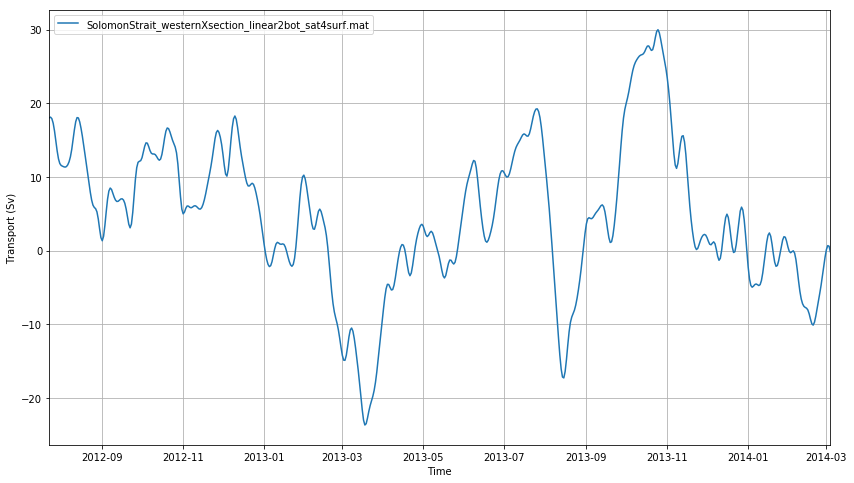

In [50]:
sel_trans = plot_trans(x, 42, py_dt)

## 4. Calculating the average of all other non-geoRef files and plotting that time series

In [95]:
total = []
for arr in range(40,48):
    if arr == 40:
        total = x['T'][40]
    elif arr == 42:
        pass
    else:
        total = np.add(total, x['T'][arr])
total = total/7

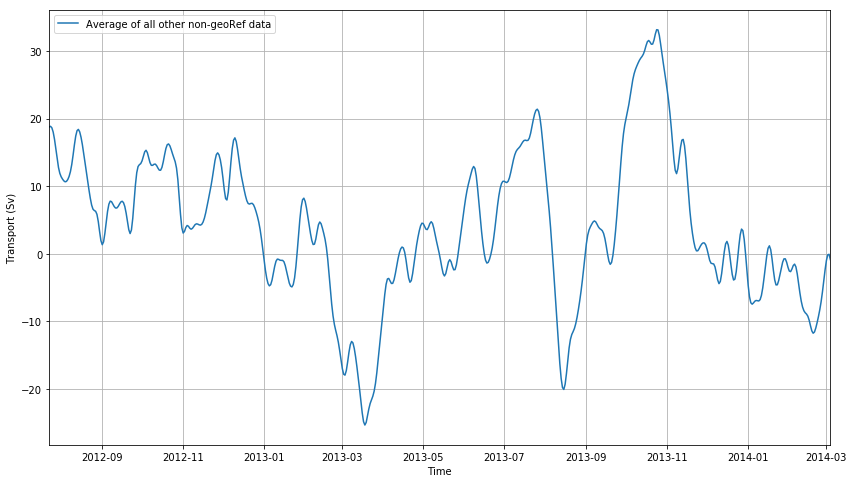

In [96]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport (Sv)')
ax.set_xlabel('Time')
label='Average of all other non-geoRef data'
ax.plot(py_dt, total, label=label)
ax.legend()
ax.set_xlim(py_dt[0], py_dt[-1])
ax.grid(True)
plt.show()

## 5. Plotting both the previous time series on the same figure

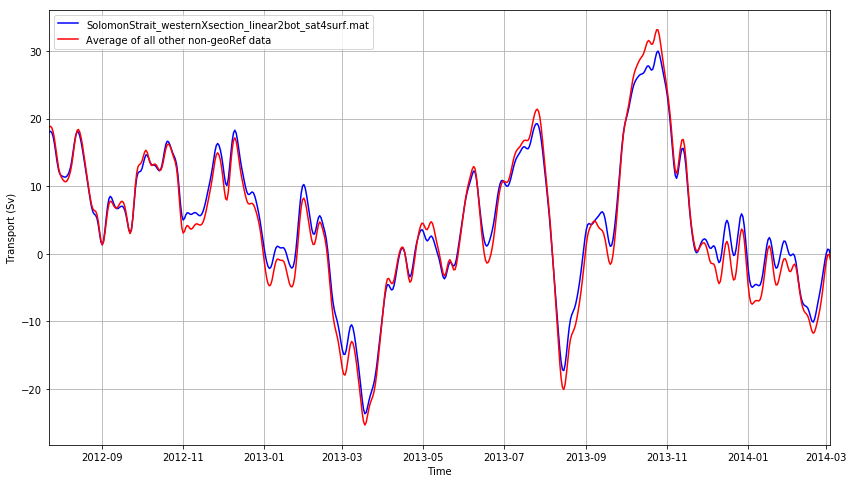

In [97]:
label1 = x['flist'][42][0][0][0]
label2 = 'Average of all other non-geoRef data'
trans1 = x['T'][42]
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport (Sv)')
ax.set_xlabel('Time')
ax.plot(py_dt, trans1, 'b', label=label1)
ax.plot(py_dt, total, 'r', label=label2)
ax.set_xlim(py_dt[0], py_dt[-1])
ax.legend()
ax.grid(True)
plt.show()

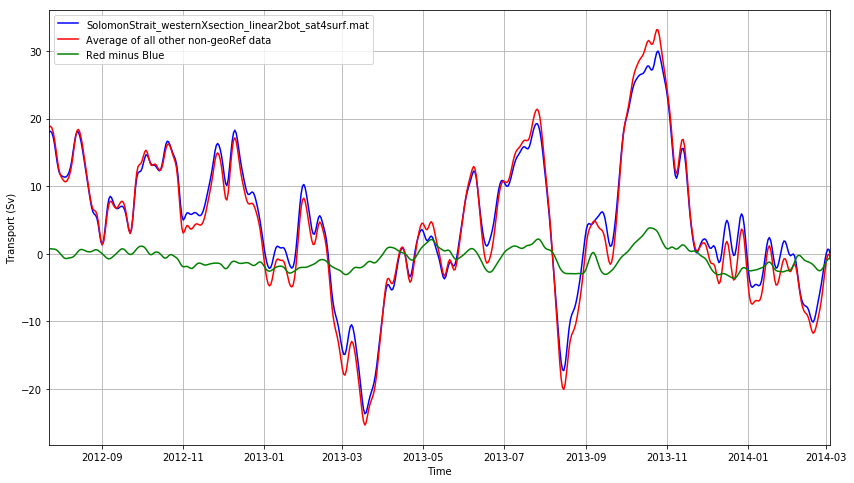

In [98]:
label1 = x['flist'][42][0][0][0]
label2 = 'Average of all other non-geoRef data'
label3 = 'Red minus Blue'
trans1 = x['T'][42]
fig, ax = plt.subplots(figsize=(14,8))
ax.set_ylabel('Transport (Sv)')
ax.set_xlabel('Time')
ax.plot(py_dt, trans1, 'b', label=label1)
ax.plot(py_dt, total, 'r', label=label2)
ax.plot(py_dt, total - trans1, 'g', label=label3)
ax.set_xlim(py_dt[0], py_dt[-1])
ax.legend()
ax.grid(True)
plt.show()